## El procedimiento:

- Análisis y limpieza de los datos
- Construir nuestro modelo de predicción 
- Evaluar el modelo y calidad de predicción

In [1]:
# Leer y manipular los datos

import numpy as np
import pandas as pd

In [2]:
# librerias para machine learning

import sklearn
from sklearn.model_selection import train_test_split

In [3]:
# librerías para las gráficas

import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [4]:
# los datos se cargan en variable

df_original = pd.read_csv("titanic.csv")

In [5]:
# Ver la información
df_original.head(5) # df == data frame

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
# drop algunas columnas -> según las características que no son relevantes

df_dropped_features = df_original.drop(["PassengerId", "Name"], axis = 1)

df_dropped_features.head(5)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:
# vemos los diferentes valores del feature sex

print("sexo", df_dropped_features["Sex"].unique())

sexo ['male' 'female']


In [8]:
# con get_dumies de panda se categoriza los diferentes features
df_categorized = pd.get_dummies(df_dropped_features)

df_categorized.head(5)

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [14]:
df_categorized.tail(5)

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
882,0,2,27.0,0,0,13.00,0,1
883,1,1,19.0,0,0,30.00,1,0
884,0,3,7.0,1,2,23.45,1,0
885,1,1,26.0,0,0,30.00,0,1
886,0,3,32.0,0,0,7.75,0,1


In [9]:
df_categorized.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_female,Sex_male
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000,887.000000,887.000000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542,0.354002,0.645998
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204,0.478480,0.478480
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920,1.000000,1.000000


In [28]:
# copia de todo el dataset
df_cleaned = df_categorized.copy()

# adios filas con valores NAN (valores no asignados)
#df_cleaned["Age"] = df_categorized.dropna(axis=1)



In [12]:
def plot_with_bar(values = None, title = None, xticks = None):
    #Assertions
    if (values == None):
        raise ValueError("values no puede estar vacio")
    if (type(values)==list) or type(values == tuple):
        pass
    else:
        raise TypeError("values debe ser una lista o tupla")
    ind = [i for i in range(len(values))]
    plt.bar(ind,values)
    plt.title(title)
    plt.xticks(ind,xticks)
    plt.show()

cantidad de hombres: 573
cantidad de mujeres: 314
cantidad de pasajeros: 887


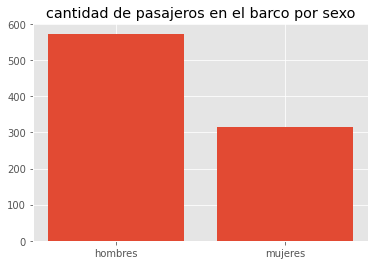

In [13]:
# hombres/mujeres entre los tripulantes

male = df_cleaned.query("Sex_male == 1")
female = df_cleaned.query("Sex_female == 1")

print("cantidad de hombres:",male.shape[0])
print("cantidad de mujeres:",female.shape[0])
print("cantidad de pasajeros:",df_original.shape[0])

# Graficando en un bar plot
plot_with_bar(values = [male.shape[0],female.shape[0]],
              title = "cantidad de pasajeros en el barco por sexo",
              xticks = ["hombres","mujeres"])

### Machine learning

In [38]:
Y = df_cleaned["Survived"]
X = df_cleaned.drop("Survived", axis = 1)

print(X.shape,Y.shape)

(887, 7) (887,)


In [40]:
TRAIN_SIZE = 0.3
VALIDATION_SIZE = 0.7

x_train, x_validation, y_train, y_validation = train_test_split(X,Y,test_size=TRAIN_SIZE,random_state=42)
print("Tamaños train set: ", x_train.shape, y_train.shape)
print("Tamaños validation set: ", x_validation.shape, y_validation.shape)

Tamaños train set:  (620, 7) (620,)
Tamaños validation set:  (267, 7) (267,)


In [41]:
# import random forest
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators = 13,
                                max_depth = 5)
modelo.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=13,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
# validamos

print("score en traiding set: ", modelo.score(x_train,y_train))
print("score en validation set: ", modelo.score(x_validation,y_validation))

score en traiding set:  1.0
score en validation set:  1.0
